# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
# Define a list of 'Categories' for the tweets

categories = ['Fitness','Tech','Politics','Comedy','Travel']

In [13]:
# Variable for time periods
n = 120

# Define a dataframe filled with data periods
data = pd.DataFrame(
    {
        'Date' : pd.date_range('01-01-2024',periods=n),
        'Category' : [random.choice(categories) for _ in range(n)],
        'Likes' : np.random.randint(0,1000,size=n)
    }
)

# Checking my work
print(data.head(10))

        Date  Category  Likes
0 2024-01-01  Politics    917
1 2024-01-02      Tech    567
2 2024-01-03    Travel    196
3 2024-01-04  Politics     97
4 2024-01-05   Fitness    383
5 2024-01-06   Fitness    424
6 2024-01-07      Tech    218
7 2024-01-08  Politics    811
8 2024-01-09    Travel    425
9 2024-01-10   Fitness    285


In [14]:
# Reading a summary of the data
print(data.describe())

            Likes
count  120.000000
mean   516.483333
std    290.002868
min     14.000000
25%    276.000000
50%    518.500000
75%    784.750000
max    994.000000


In [15]:
# Reading about data types and null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      120 non-null    datetime64[ns]
 1   Category  120 non-null    object        
 2   Likes     120 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ KB
None


In [22]:
# Count of each category
count = data['Category'].value_counts()

# Checking
print(count)

Fitness     28
Travel      27
Politics    25
Comedy      22
Tech        18
Name: Category, dtype: int64


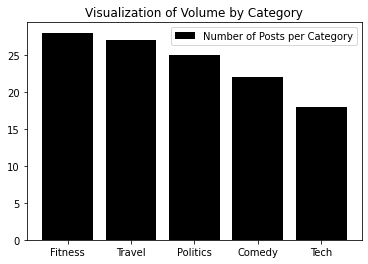

In [25]:
# Visualizing the value counts of each category
plt.bar(count.index,count,color='black',label='Number of Posts per Category')
plt.title('Visualization of Volume by Category')
plt.legend()
plt.show()

In [28]:
# Performing data type conversions

# 'Category' to data type 'Category'
# Saves some memory over time
data['Category'] = data['Category'].astype('category')

# 'Date' is already in datetime64 format by default from Pandas

# Likes is already in integer format by default from Pandas

# Checking my work
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      120 non-null    datetime64[ns]
 1   Category  120 non-null    category      
 2   Likes     120 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 2.3 KB
None


In [ ]:
# Note: Memory usage down from 2.9+ KB to 2.3 KB

In [30]:
# Checking for nulls
nulls = data.isnull().sum()

print(nulls)

Date        0
Category    0
Likes       0
dtype: int64


In [31]:
# O null values
# Moving on to visualizing likes per category

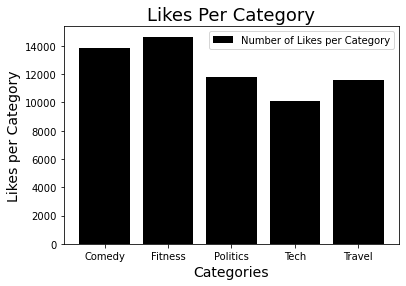

In [51]:
# Visualizing Likes per Category

# This version of seaborn 0.10.1 does not support histplot
# I'm going to do it this way instead

# Grouping likes by category
likes = data['Likes'].groupby(data['Category']).sum() # Don't forget .sum()

# Plotting
plt.bar(likes.index,likes,color='black',label='Number of Likes per Category')
plt.title('Likes Per Category',fontsize=18) # fontname='Times New Roman' not supported
plt.xlabel('Categories',fontsize=14) # fontname='Times New Roman' not supported
plt.ylabel('Likes per Category',fontsize=14) # fontname='Times New Roman' not supported
plt.legend(loc='best') # fontname='Times New Roman' not supported
plt.show()

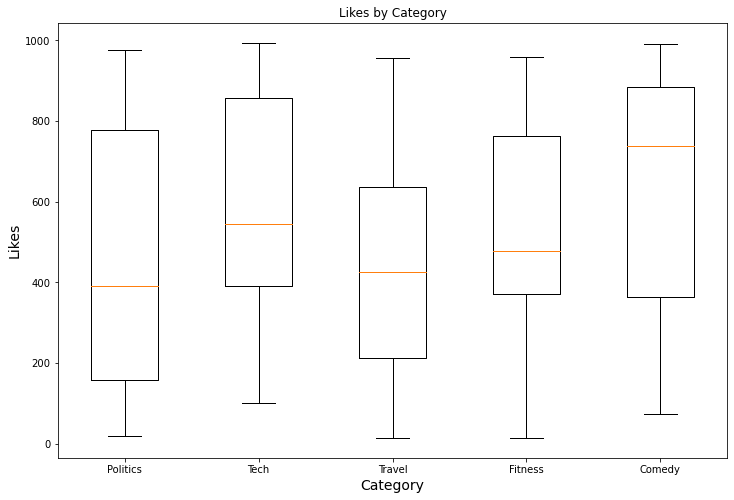

In [108]:
# Boxplot for assignment (The first boxplot I personally have every done. I had to look of stuff up to do this.)
categories = data['Category'].unique()
mydata = [data[data['Category'] == category]['Likes'] for category in categories] # This logic was challenging

plt.figure(figsize=(12,8))
plt.boxplot(mydata, labels=categories)
plt.xlabel('Category',fontsize=14)
plt.ylabel('Likes',fontsize=14)
plt.title('Likes by Category')
plt.show()


In [83]:
# Average number of likes per category over this time period (120 days)
mean_comedy = data[data['Category'] == 'Comedy']['Likes'].mean()
mean_fitness = data[data['Category'] == 'Fitness']['Likes'].mean()
mean_politics = data[data['Category'] == 'Politics']['Likes'].mean()
mean_tech = data[data['Category'] == 'Tech']['Likes'].mean()
mean_travel = data[data['Category'] == 'Travel']['Likes'].mean()

print(f"Average Comedy likes: {mean_comedy:.2f}")
print(f"Average Fitness likes: {mean_fitness:.2f}")
print(f"Average Politics likes: {mean_politics:.2f}")
print(f"Average Tech likes: {mean_tech:.2f}")
print(f"Average Travel likes: {mean_travel:.2f}")

Average Comedy likes: 629.00
Average Fitness likes: 523.36
Average Politics likes: 472.28
Average Tech likes: 561.78
Average Travel likes: 428.41


## Conclusions: <hr/>

On average Comedy recieves the most likes, but tech and politics seem to have the highest peaks. With comedy having a noticably higher mean, I would say in this hypothetical scenario that there must have been some political news story surrounding technology or regulation related to it that caused trend in the amount of attention they were receiving. The greater spread between the open and close of the box-and-whisker for politics could be the result of such a trend.

Travel doesn't seem to have the same volatility as politics or tech. The open and close of the box look to be about the same magnitude from the mean.

Looking at Comedy, we see that it dropped well below the mean; this could confirm some politically charged tech news that stole attention away from what is _actually_ the most liked category. As more attention flowed towards tech and politics, it lowered the interactions with comedy.

Fitness increased simulataneously. Maybe it was health tech? Maybe it was unrelated.

I believe a correlation analysis for individual time-series data would be in order, but the data was not laid out in such a way, and at the current moment, I'm not confident with my ability to chop it up and find out.

I would advise the "social media company" in question here to not dive into any heated political debate but to stick to comedy and fitness as the political and tech discussion is likely temporary. People like to laugh more than they like to be angry. If any political discussion were to be had, I would keep it funny and 'above the belt'.

I would also advise data be gathered daily for these categories so discrete time-series analysis may be done more effectively to prove or disprove any theories about one category having a negative relationship with another.